<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/2507_korea_ml_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지도학습-비지도학습
# 배치학습-온라인학습
# 분류(classification)    - 회귀(regression)
# 여러 개의 카테고리 중 하나 - 온도, 각도, 위치... 연속적인 값을 추정
# 선형회귀...
# sklearn을 이용... 분류..

# MNIST...

In [ ]:
from sklearn.datasets import fetch_openml

# 사이킷런 1.2에서 추가된 parser 매개변수 기본값이 1.4 버전에서 'liac-arff'에서 'auto'로 바뀝니다.
# 'auto'일 경우 희소한 ARFF 포맷일 때는 'liac-arff', 그렇지 않을 때는 'pandas'가 됩니다.
# 이에 대한 경고를 피하려면 parser='auto'로 지정하세요.
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

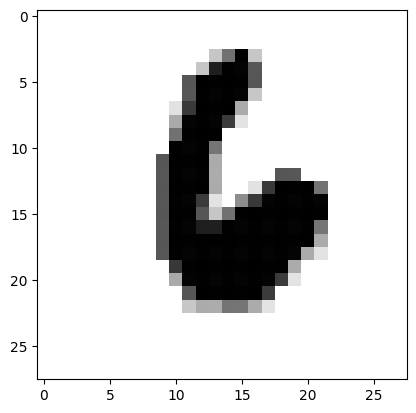

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[11000].reshape(28, 28), cmap='binary')

In [ ]:
a = [[10, 20], [10, 20], [10, 20], [10, 20], [10, 20]] # 5, 2
X#70000, 784
X[:10].shape # 10, 784

(10, 784)

In [ ]:
x_train = X[:60000] # 60000, 784
y_train = y[:60000].astype(int) # 60000,
x_valid = X[60000:] # 10000, 784
y_valid = y[60000:].astype(int) # 10000,

In [ ]:
# from sklearn.svm import SVC #support vector machine
# svc = SVC()
# svc.fit(x_train, y_train)

In [ ]:
y_train.shape

(60000,)

In [ ]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(x_train, y_train)

RidgeClassifier()

In [ ]:
model.predict(x_valid[:10]) #(N, 784) -> (N,)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

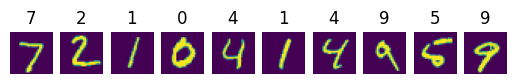

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(y_valid[i])
    plt.axis('off')
    plt.imshow(x_valid[i].reshape(28, 28))

In [ ]:
# 성능평가 accuracy (정확도)
pred = model.predict(x_valid) # pred.shape
(pred == y_valid).mean()

np.float64(0.8603)

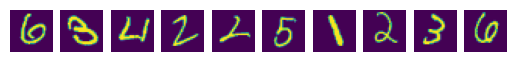

In [ ]:
failed = x_valid[~(pred == y_valid)]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    # plt.title(y_valid[i])
    plt.axis('off')
    plt.imshow(failed[i].reshape(28, 28))